## Import

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score

## Read and re-format

In [43]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df = pd.read_csv('../eda/stock.csv')  

In [44]:
print(df.head())
print(df.shape)

        STLA         GM          TM      NSANY      MBGYY      BMWYY  \
0  11.472709  37.606457  128.369995  20.040001  15.427057  25.132998   
1  11.945812  38.524128  130.130005  20.250000  15.544848  25.270378   
2  12.854664  39.711697  132.160004  20.230000  15.751436  25.443905   
3  13.551867  39.594738  133.860001  20.389999  15.934467  25.740355   
4  13.433592  39.783672  134.770004  20.440001  16.003330  25.913887   

      POAHY       TSLA       Dates  
0  6.742718  21.368668  2018-01-02  
1  6.887550  21.150000  2018-01-03  
2  7.072613  20.974667  2018-01-04  
3  7.145028  21.105333  2018-01-05  
4  7.161120  22.427334  2018-01-08  
(1478, 9)


In [45]:
df = df[['POAHY', 'TSLA']]

In [46]:
df.head()

,POAHY,TSLA
0,6.742718,21.368668
1,6.887550,21.150000
2,7.072613,20.974667
3,7.145028,21.105333
4,7.161120,22.427334


In [47]:
# Converting X and y to 2D arrays by using a list of lists
X = df.iloc[:, [0]].values  # Selects all rows and only the first column and keeps as 2D
y = df.iloc[:, [1]].values  # Selects all rows and only the second column and keeps as 2D

X, y


(array([[6.74271774],
        [6.88754988],
        [7.07261276],
        ...,
        [4.6500001 ],
        [4.67000008],
        [4.90999985]]),
 array([[ 21.3686676 ],
        [ 21.14999962],
        [ 20.9746666 ],
        ...,
        [214.6499939 ],
        [223.71000671],
        [237.41000366]]))

In [48]:
print(X.shape,y.shape)

(1478, 1) (1478, 1)


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("TRAINING SHAPES:",x_train.shape,y_train.shape)
print("TEST SHAPES:",x_test.shape,y_test.shape)

TRAINING SHAPES: (1034, 1) (1034, 1)
TEST SHAPES: (444, 1) (444, 1)


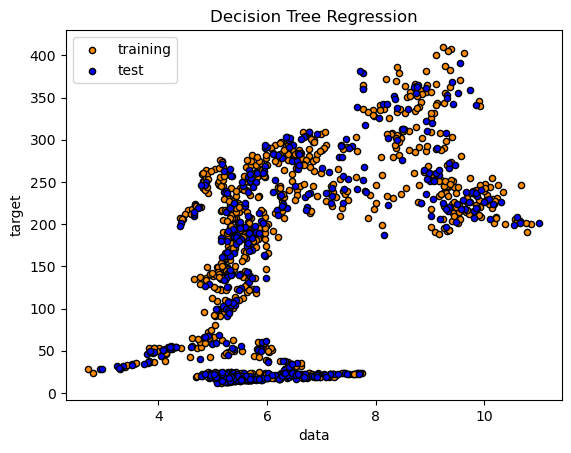

In [50]:
# # Plot the initial data
plt.figure()
plt.scatter(x_train, y_train, s=20, edgecolor="black", c="darkorange", label="training")
plt.scatter(x_test, y_test, s=20, edgecolor="black", c="b", label="test")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [51]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=4)
regr_3 = DecisionTreeRegressor(max_depth=50)

regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)


y_1 = regr_1.predict(sorted(x_test))
y_2 = regr_2.predict(sorted(x_test))
y_3 = regr_3.predict(sorted(x_test))

In [52]:
from sklearn.metrics import mean_absolute_error
print("MODEL-1: Training, test MAE:",mean_absolute_error(y_train, regr_1.predict(x_train)),mean_absolute_error(y_test, regr_1.predict(x_test)))
print("MODEL-2: Training, test MAE:",mean_absolute_error(y_train, regr_2.predict(x_train)),mean_absolute_error(y_test, regr_2.predict(x_test)))
print("MODEL-3: Training, test MAE:",mean_absolute_error(y_train, regr_3.predict(x_train)),mean_absolute_error(y_test, regr_3.predict(x_test)))


# from sklearn.metrics import mean_absolute_percentage_error
# print("MODEL-1: Training, test MAPE:",mean_absolute_percentage_error(y_train, regr_1.predict(x_train)),mean_absolute_percentage_error(y_test, regr_1.predict(x_test)))
# print("MODEL-2: Training, test MAPE:",mean_absolute_percentage_error(y_train, regr_2.predict(x_train)),mean_absolute_percentage_error(y_test, regr_2.predict(x_test)))
# print("MODEL-3: Training, test MAPE:",mean_absolute_percentage_error(y_train, regr_3.predict(x_train)),mean_absolute_percentage_error(y_test, regr_3.predict(x_test)))

# from sklearn.metrics import mean_squared_error
# print("MODEL-1: Training, test MSE:",mean_squared_error(y_train, regr_1.predict(x_train)),mean_squared_error(y_test, regr_1.predict(x_test)))
# print("MODEL-2: Training, test MSE:",mean_squared_error(y_train, regr_2.predict(x_train)),mean_squared_error(y_test, regr_2.predict(x_test)))
# print("MODEL-3: Training, test MSE:",mean_squared_error(y_train, regr_3.predict(x_train)),mean_squared_error(y_test, regr_3.predict(x_test)))

MODEL-1: Training, test MAE: 80.82229323529546 83.2379992411983
MODEL-2: Training, test MAE: 77.02593400309358 80.0420082334354
MODEL-3: Training, test MAE: 7.291053594189737 60.199355760115694


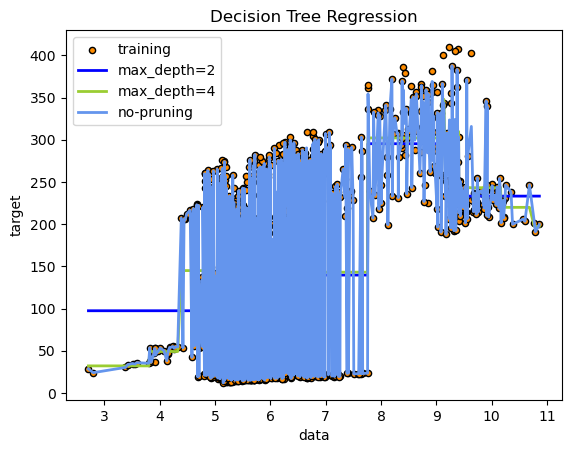

In [53]:
plt.figure()
plt.scatter(x_train, y_train, s=20, edgecolor="black", c="darkorange", label="training")
plt.plot(sorted(x_train), regr_1.predict(sorted(x_train)), color="b", label="max_depth=2", linewidth=2)
plt.plot(sorted(x_train), regr_2.predict(sorted(x_train)), color="yellowgreen", label="max_depth=4", linewidth=2)
plt.plot(sorted(x_train), regr_3.predict(sorted(x_train)), color="cornflowerblue", label="no-pruning", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

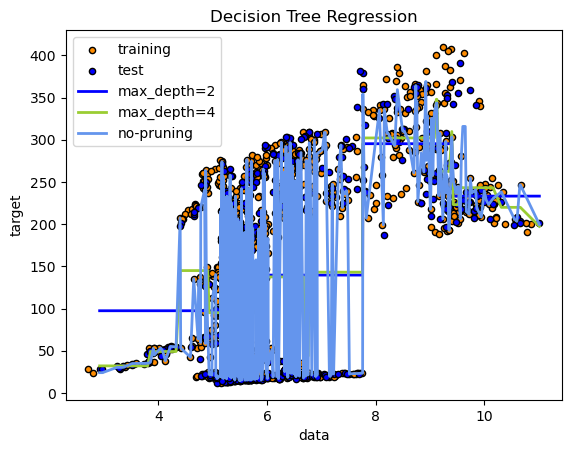

In [54]:
plt.figure()
plt.scatter(x_train, y_train, s=20, edgecolor="black", c="darkorange", label="training")
plt.scatter(x_test, y_test, s=20, edgecolor="black", c="b", label="test")
plt.plot(sorted(x_test), y_1, color="b", label="max_depth=2", linewidth=2)
plt.plot(sorted(x_test), y_2, color="yellowgreen", label="max_depth=4", linewidth=2)
plt.plot(sorted(x_test), y_3, color="cornflowerblue", label="no-pruning", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

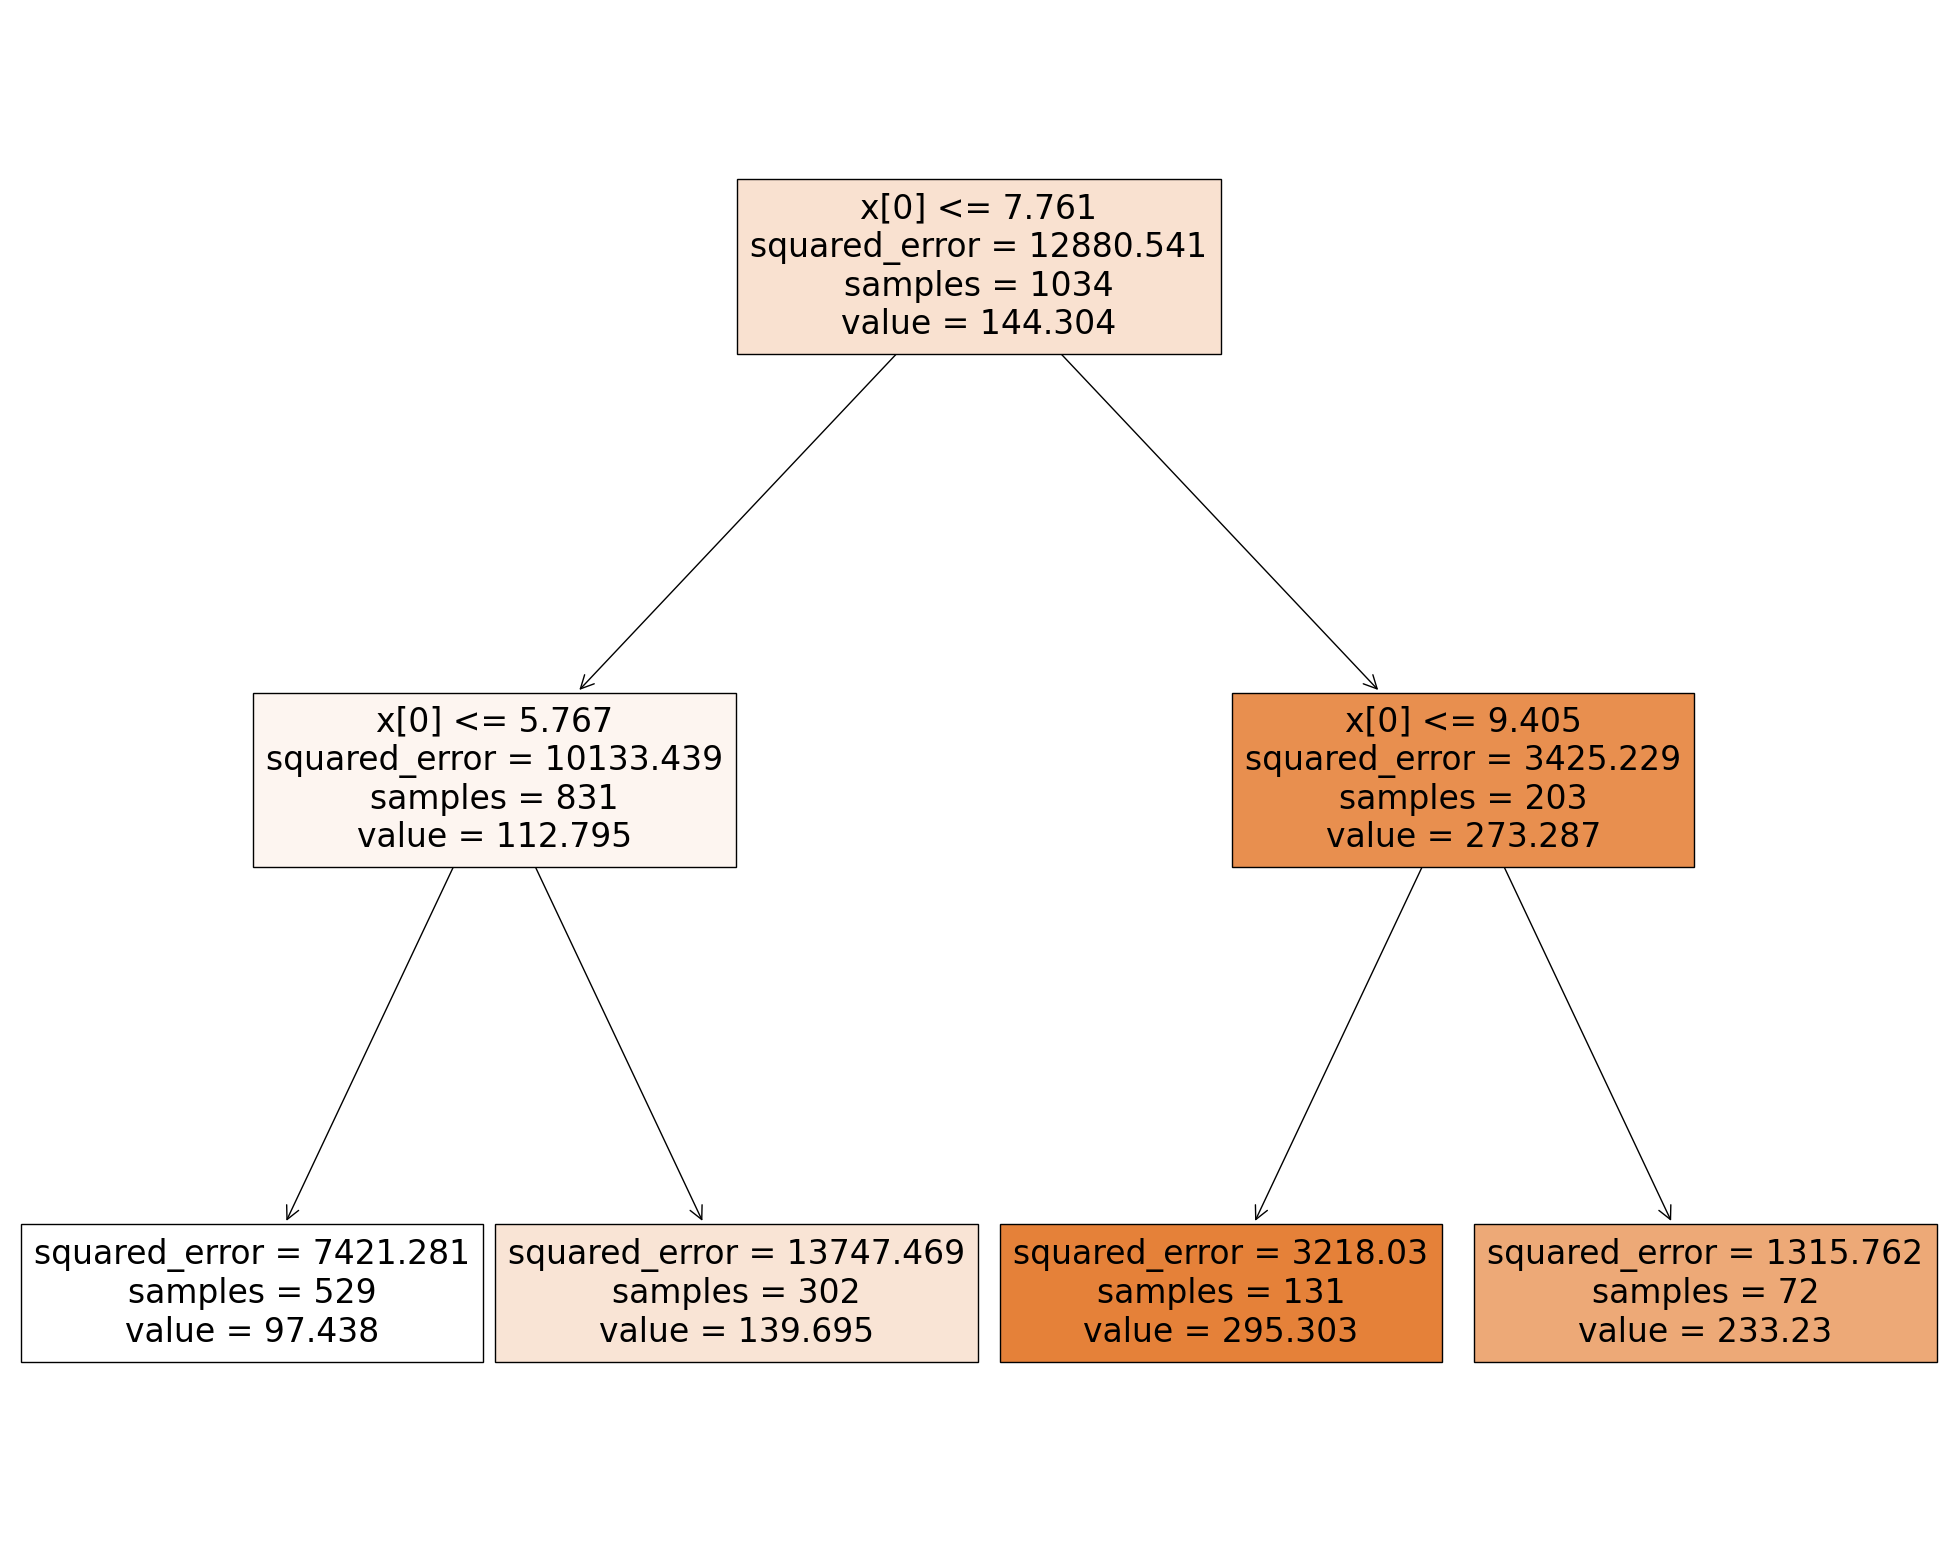

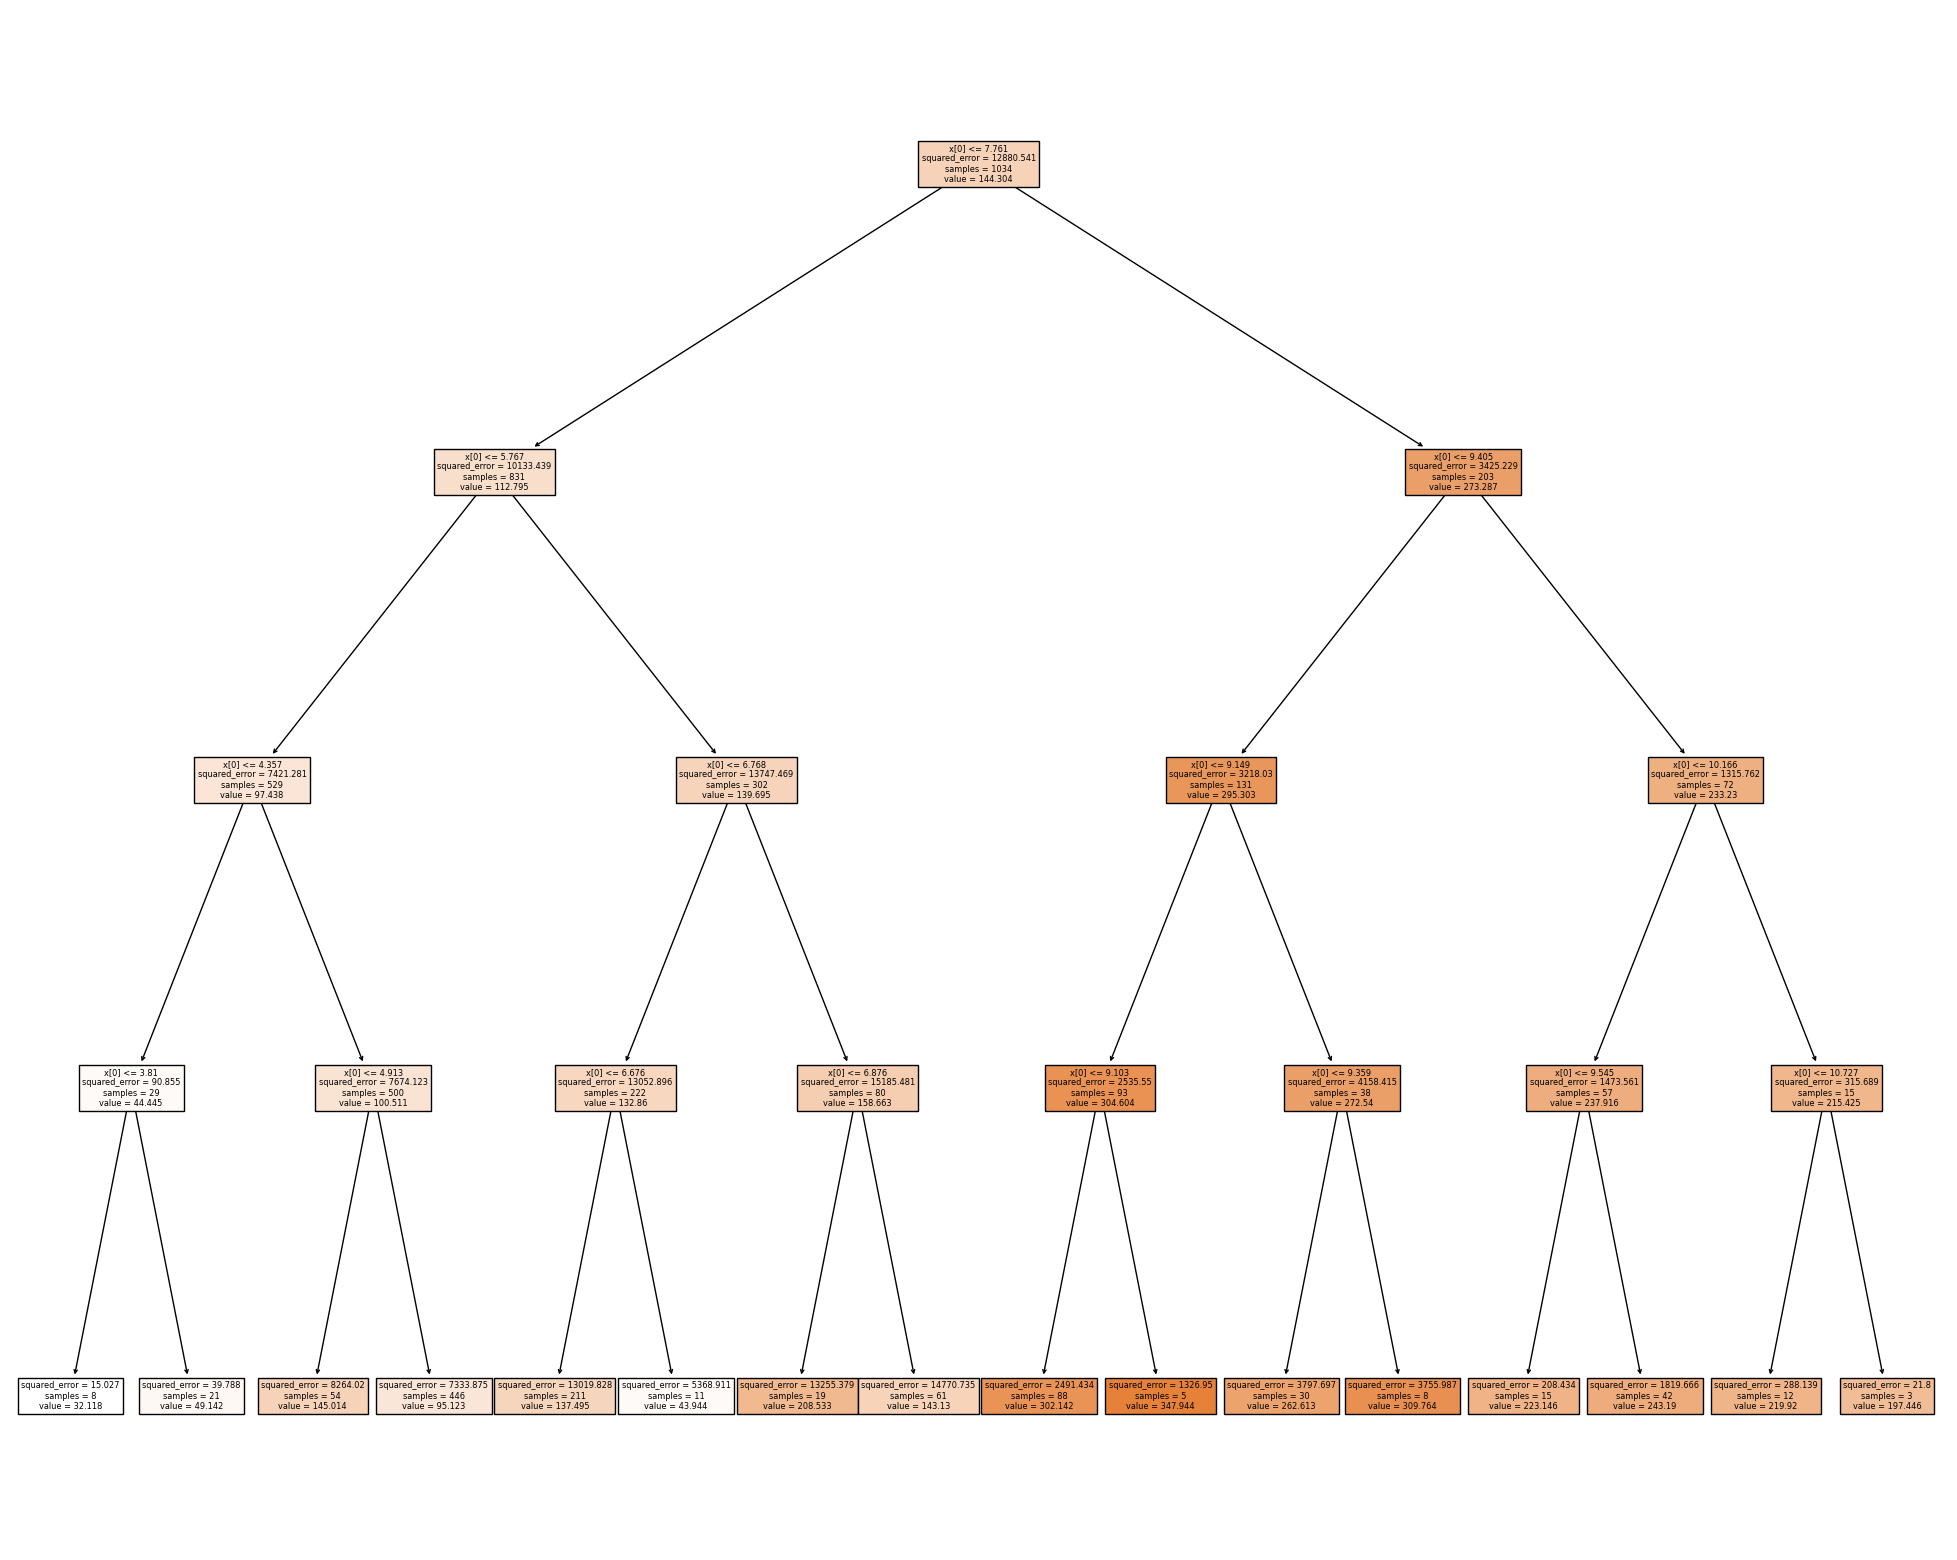

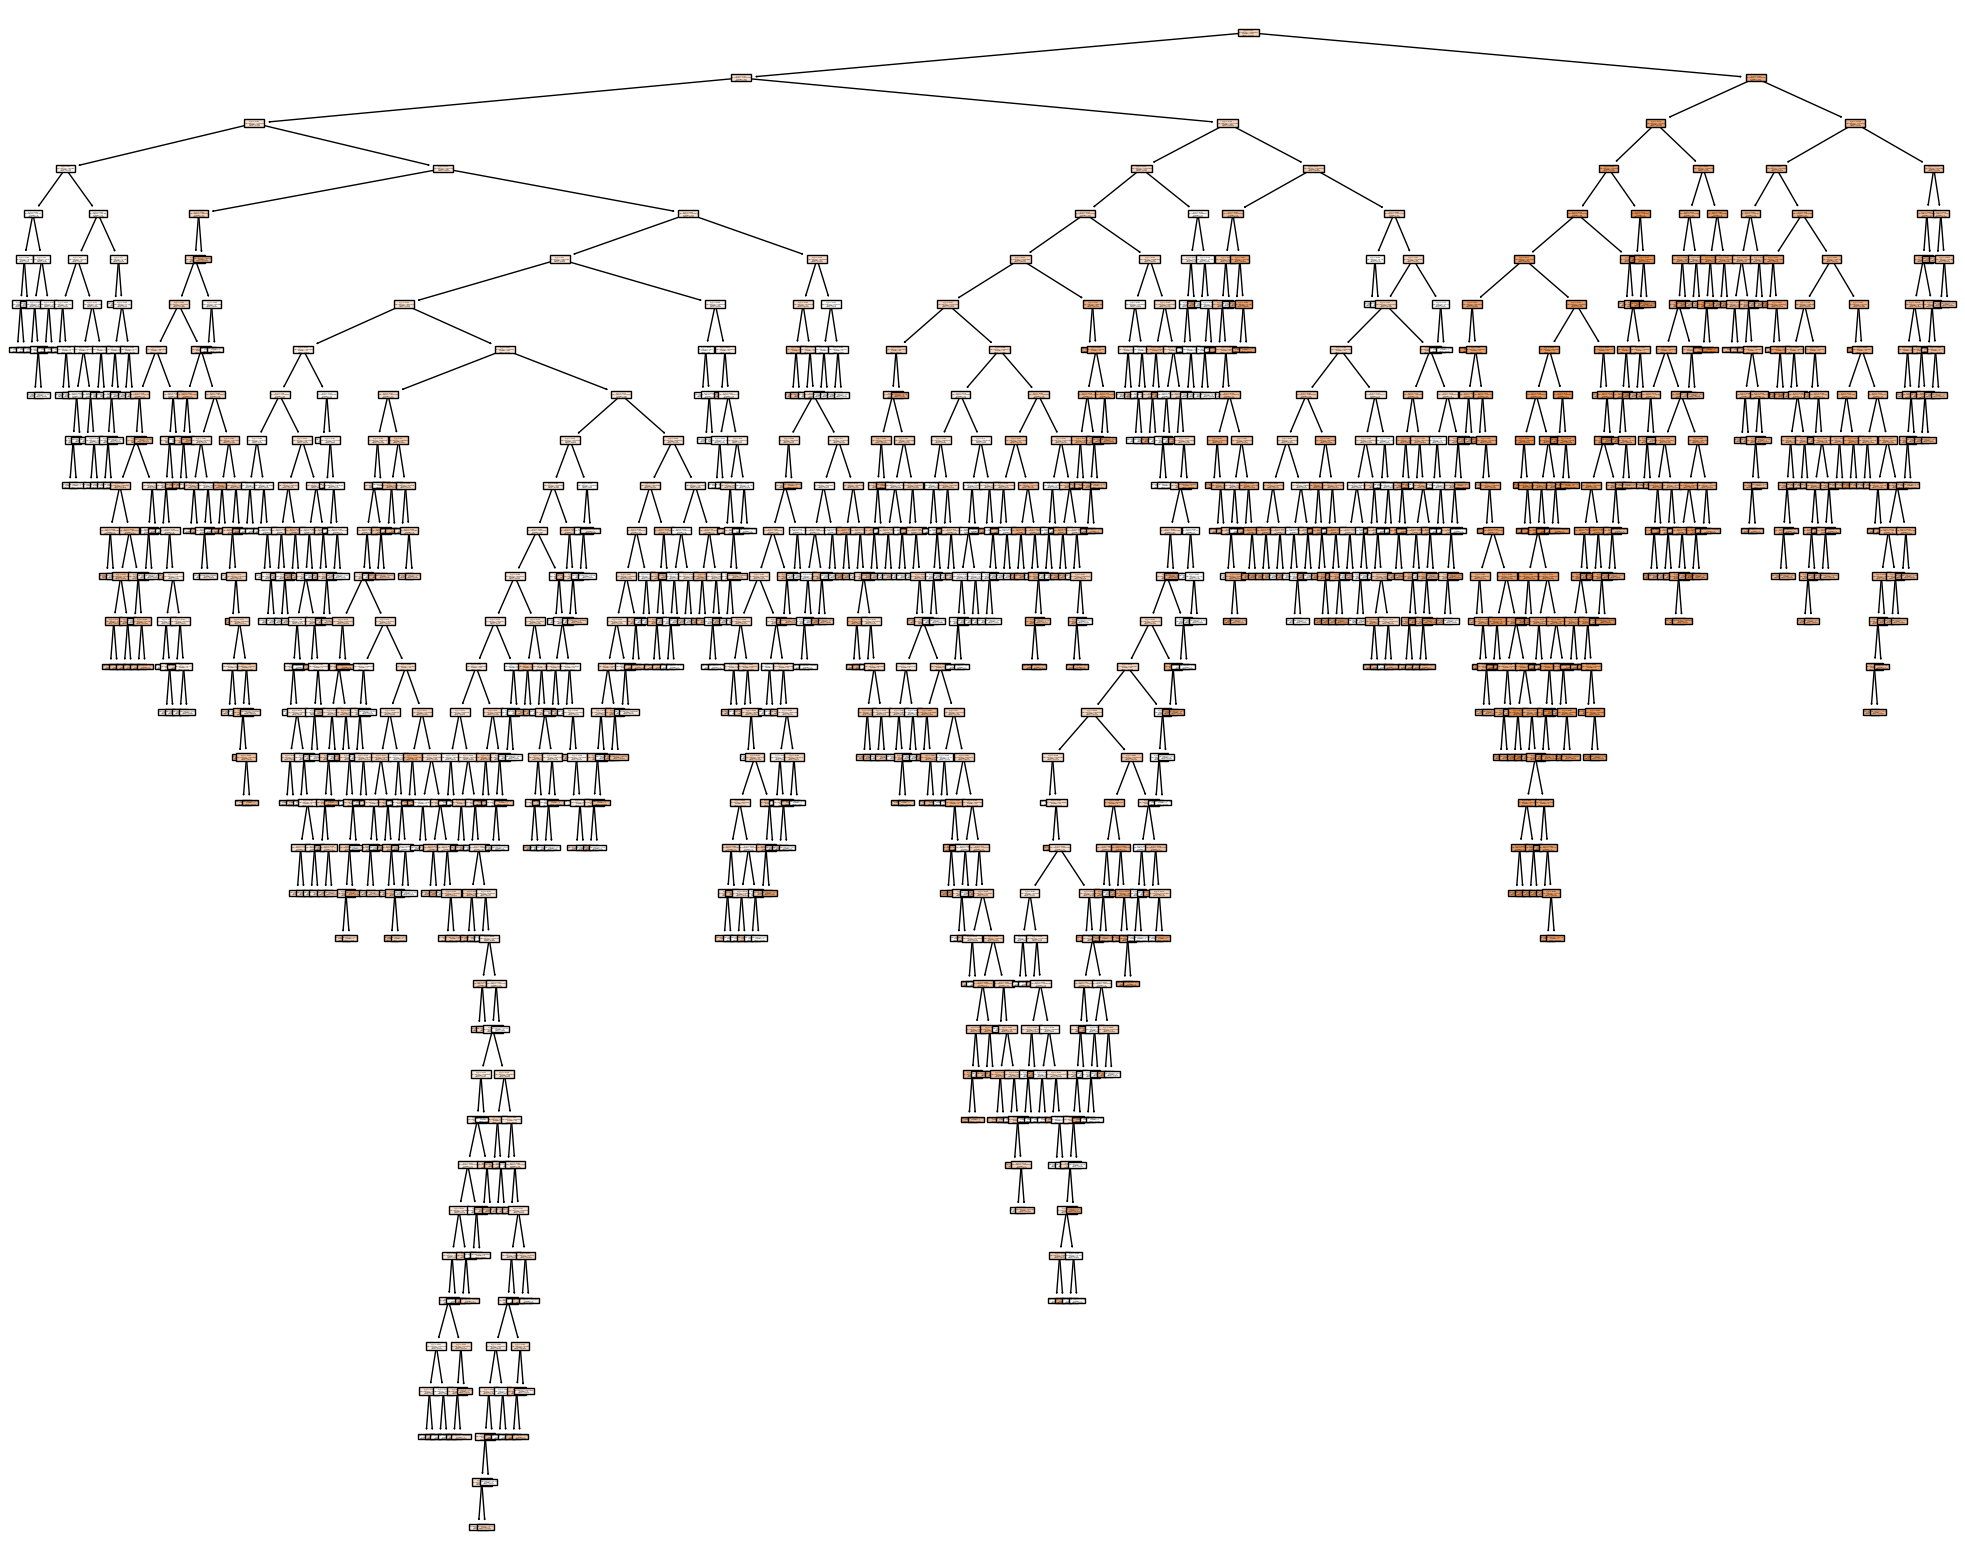

In [55]:
from sklearn import tree
def plot_tree(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                    filled=True)
    plt.show()

plot_tree(regr_1)
plot_tree(regr_2)
plot_tree(regr_3)